In [31]:
# TensorFlow and tf.keras
#https://www.tensorflow.org/tutorials/keras/basic_classification
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import time

print(tf.__version__)

1.12.0


In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [37]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

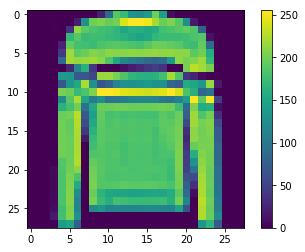

In [40]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)


In [41]:
train_images = train_images / 255.0

In [42]:
test_images = test_images / 255.0

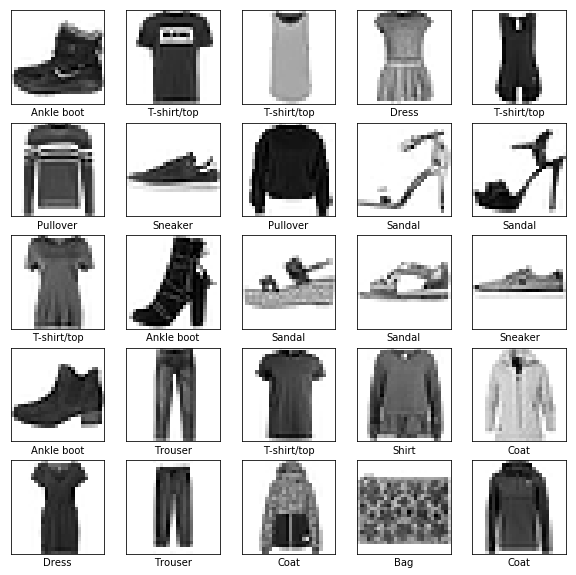

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Flatten = преобразует формат изображений из 2-мерного массива (размером 28 на 28 пикселей) в 1-мерный массив размером 28 * 28 = 784 пикселей.

#Config1

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Config2

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Config3

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Config4

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Компилируем модель

In [45]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
start_time = time.clock()
hist = model.fit(train_images, train_labels, epochs=10)
fit_time = time.clock() - start_time
print("Fit time: ", fit_time)

Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2316 - acc: 0.9128
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2219 - acc: 0.9161
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2170 - acc: 0.9185
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2095 - acc: 0.9213
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2024 - acc: 0.9244
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1976 - acc: 0.9259
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1935 - acc: 0.9279
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1885 - acc: 0.9295
Epoch 9/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1824 - acc: 0.9323
Epoch 10/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1801 - acc: 0.

In [50]:
print(hist.history)

{'loss': [0.23161498807569345, 0.22190626047948997, 0.21695874472061794, 0.20953445438543955, 0.20242129833896955, 0.19761744094689687, 0.19348301174541316, 0.18852816740671793, 0.1824447827403744, 0.180118051310877], 'acc': [0.9127833333333333, 0.9160666666666667, 0.9185333333333333, 0.9212833333333333, 0.9244333333333333, 0.9258833333333333, 0.9278666666666666, 0.9295333333333333, 0.9322833333333334, 0.9328666666666666]}


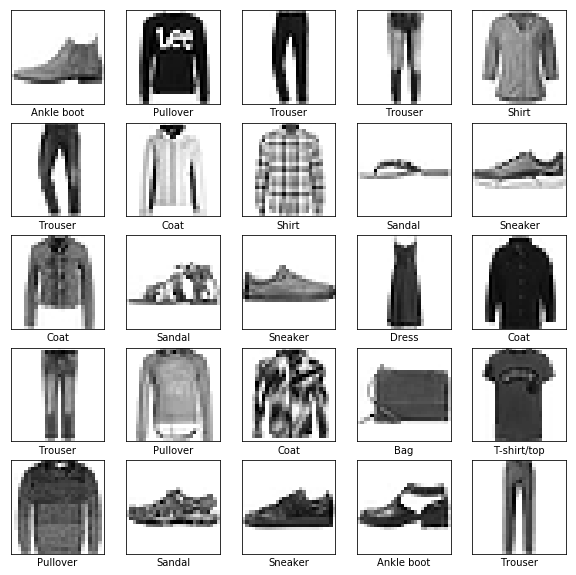

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 81us/step
Test accuracy: 0.8851
Test loss: 0.3591046081900597


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.10127610e-06, 3.40925888e-09, 1.09266054e-07, 1.81868849e-08,
       2.68608291e-09, 1.30187706e-04, 3.68459041e-07, 3.66705097e-02,
       6.67323530e-09, 9.63197649e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

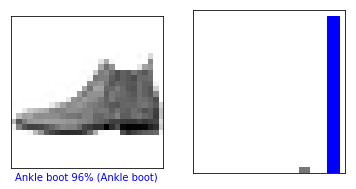

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

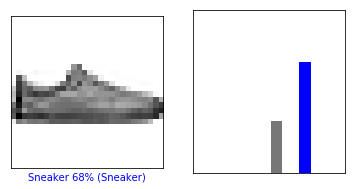

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

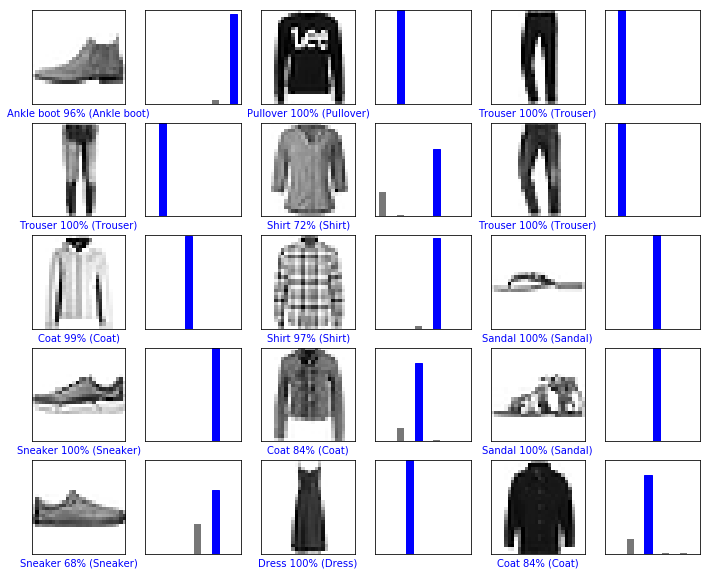

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [54]:
img = (np.expand_dims(img,0))

In [55]:
predictions_single = model.predict(img)

[[2.4643933e-08 9.9782399e-14 3.9126103e-12 3.7007335e-16 3.4297071e-10
  5.4132855e-05 1.5229292e-12 3.2076586e-04 3.2734652e-11 9.9962509e-01]]


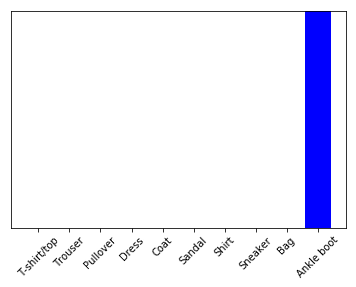

In [56]:
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])